In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mplhep as hep
plt.style.use(hep.style.ROOT)
plt.style.use(hep.style.firamath)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 2

In [3]:
def plot_data(X, features, y=None, path=None):

    size = int(len(features)*1.5)   # old *0.6)
    dims = len(features)
    if y is not None:
        dims += 1

    fig, axs = plt.subplots(dims, 1, figsize=(17, size), sharex=True)

    for dim, feat in enumerate(features):  # iterate through the features we're using
        # print(feat)
        x_t = X[:, dim]
        axs[dim].plot(x_t)
        # if y is not None:
        #     y_scaled = np.max(x_t)*y
        #     axs[dim].plot(y_scaled, '--', linewidth=1, color='tab:orange', label='anomalies')
        # turn ylabel by 0 degrees and shift it to the left
        axs[dim].set_ylabel(feat, rotation=0, ha='right', rotation_mode='default', labelpad=5)
        # Align all y-axis labels by setting the same label coordinates
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        # axs[dim].legend(loc='upper right')
    if y is not None: # plot the target variable in last dimension if we have truth labels
        axs[-1].plot(y, '--', color='tab:red')
        axs[-1].set_yticks([0, 1])
        axs[-1].set_ylabel('anomalies', rotation=0, ha='right', rotation_mode='default', labelpad=5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)

    axs[-1].set_xlabel('Transactions')  # looks alignment-wise better than supxlabel
    # fig.supylabel('values')
    # fig.supxlabel('Time stamp [min]')
    plt.tight_layout()
    if path is not None:
        plt.savefig(f'{path}.png', dpi=100, facecolor='white')
    else:
        plt.show()
    plt.close()

In [4]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/train.csv')
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/test.csv')
labels = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/labels.csv')

In [5]:
print(x_train.shape, x_test.shape)
# print(x_train.columns, x_test.columns)
print(labels.shape)

(561013, 70) (29527, 70)
(29527, 2)


In [6]:
print(x_train.shape)
print(x_train.dtypes)

# Filter columns that are NOT of type 'float' and for now pop them out
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)

print(x_train.shape)
print(x_test.shape)

(561013, 70)
TransactionID      float64
transactionamt     float64
productcd           object
card1              float64
card2              float64
                    ...   
id_20              float64
devicetype          object
deviceinfo          object
ENTITY_ID           object
EVENT_TIMESTAMP     object
Length: 70, dtype: object
Columns without numeric values: Index(['productcd', 'card6', 'p_emaildomain', 'r_emaildomain', 'devicetype',
       'deviceinfo', 'ENTITY_ID', 'EVENT_TIMESTAMP'],
      dtype='object') 8
productcd object
card6 object
p_emaildomain object
r_emaildomain object
devicetype object
deviceinfo object
ENTITY_ID object
EVENT_TIMESTAMP object
(561013, 70)
(29527, 70)


In [7]:
x_train = x_train.sort_values(['EVENT_TIMESTAMP'])
x_test = x_test.sort_values(['EVENT_TIMESTAMP'])
# date_train = x_train.pop('EVENT_TIMESTAMP')
# print(date_train.shape, date_train)
# date_test = x_test.pop('EVENT_TIMESTAMP')
# print(date_test.shape, date_test)

In [8]:
feature_names = list(x_train.columns)
print(len(feature_names), feature_names)

70 ['TransactionID', 'transactionamt', 'productcd', 'card1', 'card2', 'card3', 'card5', 'card6', 'addr1', 'dist1', 'p_emaildomain', 'r_emaildomain', 'c1', 'c2', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'v62', 'v70', 'v76', 'v78', 'v82', 'v91', 'v127', 'v130', 'v139', 'v160', 'v165', 'v187', 'v203', 'v207', 'v209', 'v210', 'v221', 'v234', 'v257', 'v258', 'v261', 'v264', 'v266', 'v267', 'v271', 'v274', 'v277', 'v283', 'v285', 'v289', 'v291', 'v294', 'id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20', 'devicetype', 'deviceinfo', 'ENTITY_ID', 'EVENT_TIMESTAMP']


In [9]:
# Group by ENTITY_ID for train data
train_group = x_train.groupby('ENTITY_ID')
print(train_group.size(), len(train_group))
# count how many entries in group are > 10
train_uid = train_group.size()[train_group.size() >= 50].index
train_uid = list(train_uid)
print(len(train_uid), train_uid)

max_len = max(train_group.size())
print(max_len, max(train_group.size()[train_group.size() == max_len].index))


ENTITY_ID
1000.0_nan_66.0          1
10000.0_184.0_-37.0      1
10003.0_nan_90.0         5
10004.0_123.0_-215.0     1
10004.0_177.0_7.0        1
                        ..
9998.0_512.0_162.0       1
9999.0_330.0_13.0        1
9999.0_330.0_21.0        1
9999.0_330.0_35.0       15
9999.0_441.0_81.0        1
Length: 208962, dtype: int64 208962
213 ['11157.0_204.0_-58.0', '11207.0_126.0_-74.0', '1137.0_299.0_-480.0', '12163.0_204.0_-71.0', '12318.0_299.0_-7.0', '12501.0_204.0_-482.0', '12544.0_441.0_-54.0', '12544.0_476.0_-102.0', '12570.0_191.0_-22.0', '12616.0_nan_-491.0', '12695.0_126.0_33.0', '12695.0_325.0_-124.0', '12695.0_325.0_-28.0', '12695.0_325.0_-342.0', '12695.0_325.0_-480.0', '12725.0_204.0_-115.0', '12741.0_143.0_-202.0', '12839.0_264.0_36.0', '12839.0_264.0_40.0', '12866.0_330.0_-423.0', '12932.0_325.0_-23.0', '13108.0_191.0_-50.0', '13155.0_472.0_21.0', '13241.0_126.0_33.0', '13455.0_231.0_-298.0', '13481.0_325.0_-23.0', '13597.0_191.0_-48.0', '13623.0_498.0_117.0', '13780

In [10]:
# get the transaction ids for each user which has more than 50 transactions
train_tranID = np.empty((0))
for _, group in train_group:
    if len(group) >= 50:
        train_tranID = np.concatenate((train_tranID, group['TransactionID'].values), axis=None) 

train_tranID.flatten()  # don't care which uid they belond to, just want list of used transactions
print(len(train_tranID), train_tranID.shape)
print(len(np.unique(train_tranID)))

16708 (16708,)
16708


In [11]:
# repeat same for testing, but accept shorter time series (i.e. >=20)
test_group = x_test.groupby('ENTITY_ID')
print(test_group.size(), len(test_group))

test_uid = test_group.size()[test_group.size() >= 20].index  # allow shorter time series for testing!
test_uid = list(test_uid)
print(len(train_uid), train_uid)


ENTITY_ID
10007.0_433.0_175.0    1
10009.0_485.0_88.0     1
10011.0_476.0_-11.0    1
10011.0_476.0_173.0    1
10011.0_476.0_174.0    1
                      ..
9998.0_315.0_-117.0    2
9998.0_327.0_141.0     1
9998.0_433.0_174.0     1
9998.0_441.0_131.0     1
9998.0_441.0_145.0     1
Length: 18337, dtype: int64 18337
213 ['11157.0_204.0_-58.0', '11207.0_126.0_-74.0', '1137.0_299.0_-480.0', '12163.0_204.0_-71.0', '12318.0_299.0_-7.0', '12501.0_204.0_-482.0', '12544.0_441.0_-54.0', '12544.0_476.0_-102.0', '12570.0_191.0_-22.0', '12616.0_nan_-491.0', '12695.0_126.0_33.0', '12695.0_325.0_-124.0', '12695.0_325.0_-28.0', '12695.0_325.0_-342.0', '12695.0_325.0_-480.0', '12725.0_204.0_-115.0', '12741.0_143.0_-202.0', '12839.0_264.0_36.0', '12839.0_264.0_40.0', '12866.0_330.0_-423.0', '12932.0_325.0_-23.0', '13108.0_191.0_-50.0', '13155.0_472.0_21.0', '13241.0_126.0_33.0', '13455.0_231.0_-298.0', '13481.0_325.0_-23.0', '13597.0_191.0_-48.0', '13623.0_498.0_117.0', '13780.0_441.0_-454.0', '1393.

In [12]:
# get the transaction ids for each user which has more than 20 transactions for testing
test_tranID = np.empty((0))
for _, group in test_group:
    if len(group) >= 20:
        test_tranID = np.concatenate((test_tranID, group['TransactionID'].values), axis=None) 

test_tranID.flatten()  # don't care which uid they belond to, just want list of used transactions
print(len(test_tranID), test_tranID.shape)
print(len(np.unique(test_tranID)))

929 (929,)
929


In [13]:
# get train data for chosen transactions in train_tranID
x_train = x_train[x_train['TransactionID'].isin(train_tranID)]  
print(x_train.shape)

# get test data for chosen transactions in test_tranID
x_test = x_test[x_test['TransactionID'].isin(test_tranID)]
print(x_test.shape)

(16708, 70)
(929, 70)


In [14]:
# checks
print(x_train.columns)
print(x_train.head())
print(x_train['TransactionID'].isna().sum(), x_test['TransactionID'].isna().sum())

Index(['TransactionID', 'transactionamt', 'productcd', 'card1', 'card2',
       'card3', 'card5', 'card6', 'addr1', 'dist1', 'p_emaildomain',
       'r_emaildomain', 'c1', 'c2', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'v62', 'v70', 'v76', 'v78', 'v82', 'v91',
       'v127', 'v130', 'v139', 'v160', 'v165', 'v187', 'v203', 'v207', 'v209',
       'v210', 'v221', 'v234', 'v257', 'v258', 'v261', 'v264', 'v266', 'v267',
       'v271', 'v274', 'v277', 'v283', 'v285', 'v289', 'v291', 'v294', 'id_01',
       'id_02', 'id_05', 'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20',
       'devicetype', 'deviceinfo', 'ENTITY_ID', 'EVENT_TIMESTAMP'],
      dtype='object')
    TransactionID  transactionamt productcd    card1  card2  card3  card5  \
3       2987003.0          50.000         W  18132.0  567.0  150.0  117.0   
48      2987048.0          42.294         C  15885.0  545.0  185.0  138.0   
74      2987074.0          27.793         C  15885.0  545.0  185

In [15]:
def plot_input_distr(data, feature_names, non_num_cols, train=True):

    for feat in feature_names:
        tmp = data[feat].copy()

        if train:
            name = f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_pca/feature_distr_zoom/train_{feat}.png'
        else:
            name = f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_pca/feature_distr_zoom/test_{feat}.png'        
        
        if feat in non_num_cols:
            tmp = tmp.fillna('missing')
            # for plotting
            unique_values, counts = np.unique(tmp, return_counts=True)
            if unique_values.shape[0] > 25:  # take 25 most frequent values for plots
                idx = np.argsort(counts)[::-1][:25]
                unique_values = unique_values[idx]
                counts = counts[idx]
                lab = f'showing 25 most frequent \nof {len(np.unique(tmp))} unique values'
            else:
                lab = f'{len(np.unique(tmp))} unique values'
            
            plt.bar(unique_values, counts, label=lab)
            if feat in ['p_emaildomain', 'r_emaildomain', 'deviceinfo']:
                plt.xticks(rotation=50, ha='right')

        else:
            tmp = tmp.fillna(0)
            print(np.max(tmp), np.min(tmp))
            plt.hist(tmp, bins=50, range=[np.quantile(tmp,0.03), np.quantile(tmp,0.97)], label=f'mean: {np.mean(tmp):.1f}, std: {np.std(tmp):.1f} \nmin: {np.min(tmp):.1f}, max: {np.max(tmp):.1f}')
        
        plt.title(feat)
        plt.legend()
        plt.tight_layout()    
        plt.show()
        # plt.savefig(name, dpi=300, facecolor='white')
        # plt.close()
        

In [16]:
# # plot input data distribution
# short_feature_names = feature_names
# short_feature_names.remove('TransactionID')
# short_feature_names.remove('ENTITY_ID')
# short_feature_names.remove('EVENT_TIMESTAMP')
# plot_input_distr(x_train, short_feature_names, non_num_cols, train=True)
# plot_input_distr(x_test, short_feature_names, non_num_cols, train=False)

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoding = {}       # for categorical features, dict containing encode & feature name as key
other_values = {}   # for categorical features, dict containing less frequent categories that will just be replaced by 'other' 
x_train1 = x_train.copy()  # to avoid modifying initial input data

for i, feat in enumerate(feature_names):
    print(feat)
    if feat in non_num_cols and feat not in ['ENTITY_ID', 'EVENT_TIMESTAMP']:  # fill nan values + do encoding for cat features (except for uid and timestamp)
        print('cat feature: ', feat)
        x_train1[feat] = x_train1[feat].fillna('missing')
        arr = x_train1[feat].values

        unique_values, counts = np.unique(arr, return_counts=True)
        print(len(unique_values))

        if len(unique_values) > 50:  # take 100 most frequent values for encoding
            idx = np.argsort(counts)
            unique_values = unique_values[idx]  # unique values sorted in frequency
            other_values[feat] = unique_values[49:]   # values to be encoded as 'other'
            print(other_values)
            # replace all elements of x_train1[feat] that are in other_values with 'other'
            idx = np.where(np.isin(arr, other_values[feat]))
            arr[idx] = 'other'

        enc = OneHotEncoder(handle_unknown='ignore')
        encoded_arr = enc.fit_transform(arr.reshape(-1,1)).toarray()
        encoding[feat] = enc    # save encoder for testing data

        new_feat = pd.DataFrame(encoded_arr, columns=enc.get_feature_names_out(input_features =[feat]))
        new_feat = new_feat.reset_index(drop=True)

        x_train1.drop(columns=[feat], inplace=True)
        print(x_train1.shape)
        x_train1 = x_train1.reset_index(drop=True)   # Reset index to ensure proper concatenation with new_feat (where indexing starts from 0)
        x_train1 = pd.concat([x_train1, new_feat], axis=1)
        print(x_train1.shape)
        
        print('checking if there are any nan entries:\n', 
              x_train1.loc[:,enc.get_feature_names_out(input_features =[feat])].isna().sum())

    else:  # fill nan values
        print('num feature: ', feat)
        x_train1.loc[:,feat] = x_train1.loc[:,feat].fillna(0)

        print('checking if there are any nan entries:', x_train1.loc[:,feat].isna().sum())

print(encoding.keys())
print(x_train1.shape)

TransactionID
num feature:  TransactionID
checking if there are any nan entries: 0
transactionamt
num feature:  transactionamt
checking if there are any nan entries: 0
productcd
cat feature:  productcd
5
(16708, 69)
(16708, 74)
checking if there are any nan entries:
 productcd_C    0
productcd_H    0
productcd_R    0
productcd_S    0
productcd_W    0
dtype: int64
card1
num feature:  card1
checking if there are any nan entries: 0
card2
num feature:  card2
checking if there are any nan entries: 0
card3
num feature:  card3
checking if there are any nan entries: 0
card5
num feature:  card5
checking if there are any nan entries: 0
card6
cat feature:  card6
3
(16708, 73)
(16708, 76)
checking if there are any nan entries:
 card6_credit     0
card6_debit      0
card6_missing    0
dtype: int64
addr1
num feature:  addr1
checking if there are any nan entries: 0
dist1
num feature:  dist1
checking if there are any nan entries: 0
p_emaildomain
cat feature:  p_emaildomain
33
(16708, 75)
(16708, 108)


In [19]:
# repeat for test data
x_test1 = x_test.copy()  # to avoid modifying initial input data

for i, feat in enumerate(feature_names):
    print(feat)
    if feat in non_num_cols and feat not in ['ENTITY_ID', 'EVENT_TIMESTAMP']:  # fill nan values + do encoding for cat features (except for uid and timestamp)
        print('cat feature: ', feat)
        x_test1[feat] = x_test1[feat].fillna('missing')
        arr = x_test1[feat].values

        if feat in other_values:
            # replace all elements of x_test1[feat] that are in other_values (previously defined) with 'other'
            idx = np.where(np.isin(arr, other_values[feat]))
            arr[idx] = 'other'

        enc = encoding[feat]  # use the previously fitted encoder
        encoded_arr = enc.transform(arr.reshape(-1,1)).toarray()

        new_feat = pd.DataFrame(encoded_arr, columns=enc.get_feature_names_out(input_features =[feat]))
        new_feat = new_feat.reset_index(drop=True)

        x_test1.drop(columns=[feat], inplace=True)
        print(x_test1.shape)
        x_test1 = x_test1.reset_index(drop=True)   # Reset index to ensure proper concatenation with new_feat (where indexing starts from 0)
        x_test1 = pd.concat([x_test1, new_feat], axis=1)
        print(x_test1.shape)
        
        print('checking if there are any nan entries:\n', 
              x_test1.loc[:,enc.get_feature_names_out(input_features =[feat])].isna().sum())

    else:  # fill nan values
        print('num feature: ', feat)
        x_test1.loc[:,feat] = x_test1.loc[:,feat].fillna(0)

        print('checking if there are any nan entries:', x_test1.loc[:,feat].isna().sum())

print(x_test1.shape)

TransactionID
num feature:  TransactionID
checking if there are any nan entries: 0
transactionamt
num feature:  transactionamt
checking if there are any nan entries: 0
productcd
cat feature:  productcd
(929, 69)
(929, 74)
checking if there are any nan entries:
 productcd_C    0
productcd_H    0
productcd_R    0
productcd_S    0
productcd_W    0
dtype: int64
card1
num feature:  card1
checking if there are any nan entries: 0
card2
num feature:  card2
checking if there are any nan entries: 0
card3
num feature:  card3
checking if there are any nan entries: 0
card5
num feature:  card5
checking if there are any nan entries: 0
card6
cat feature:  card6
(929, 73)
(929, 76)
checking if there are any nan entries:
 card6_credit     0
card6_debit      0
card6_missing    0
dtype: int64
addr1
num feature:  addr1
checking if there are any nan entries: 0
dist1
num feature:  dist1
checking if there are any nan entries: 0
p_emaildomain
cat feature:  p_emaildomain
(929, 75)
(929, 108)
checking if there a

In [20]:
# update feature names
updated_feature_names = list(x_train1.columns)
print(updated_feature_names)

['TransactionID', 'transactionamt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1', 'c1', 'c2', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'v62', 'v70', 'v76', 'v78', 'v82', 'v91', 'v127', 'v130', 'v139', 'v160', 'v165', 'v187', 'v203', 'v207', 'v209', 'v210', 'v221', 'v234', 'v257', 'v258', 'v261', 'v264', 'v266', 'v267', 'v271', 'v274', 'v277', 'v283', 'v285', 'v289', 'v291', 'v294', 'id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20', 'ENTITY_ID', 'EVENT_TIMESTAMP', 'productcd_C', 'productcd_H', 'productcd_R', 'productcd_S', 'productcd_W', 'card6_credit', 'card6_debit', 'card6_missing', 'p_emaildomain_aim.com', 'p_emaildomain_anonymous.com', 'p_emaildomain_aol.com', 'p_emaildomain_att.net', 'p_emaildomain_bellsouth.net', 'p_emaildomain_charter.net', 'p_emaildomain_comcast.net', 'p_emaildomain_gmail', 'p_emaildomain_gmail.com', 'p_emaildomain_hotmail.co.uk', 'p_emaildomain_hotmail.com', 'p_emaildomain_hotmail.es', 'p_email

In [21]:
# don't keep any non-numerical features for PCA
train_info = x_train1[['ENTITY_ID', 'EVENT_TIMESTAMP']]
train_info.index = x_train['TransactionID']
test_info = x_test1[['ENTITY_ID', 'EVENT_TIMESTAMP']]
test_info.index = x_test['TransactionID']
print(train_info.shape, test_info.shape)
print(train_info.head())
print(test_info.head())

(16708, 2) (929, 2)
                          ENTITY_ID       EVENT_TIMESTAMP
TransactionID                                            
2987003.0      18132.0_476.0_-111.0  2021-01-02T00:01:39Z
2987048.0           15885.0_nan_1.0  2021-01-02T00:15:17Z
2987074.0           15885.0_nan_1.0  2021-01-02T00:22:55Z
2987085.0           15885.0_nan_1.0  2021-01-02T00:25:35Z
2987090.0           15885.0_nan_1.0  2021-01-02T00:27:26Z
                         ENTITY_ID       EVENT_TIMESTAMP
TransactionID                                           
3548013.0      15775.0_330.0_129.0  2021-06-21T23:11:15Z
3548014.0      15775.0_330.0_129.0  2021-06-21T23:11:29Z
3548015.0      15775.0_330.0_129.0  2021-06-21T23:11:45Z
3548016.0      15775.0_330.0_129.0  2021-06-21T23:12:00Z
3548018.0      15775.0_330.0_129.0  2021-06-21T23:12:16Z


In [22]:
x_train1.drop(columns=['ENTITY_ID', 'TransactionID', 'EVENT_TIMESTAMP'], inplace=True)
x_test1.drop(columns=['ENTITY_ID', 'TransactionID', 'EVENT_TIMESTAMP'], inplace=True)
print(x_train1.shape, x_test1.shape)

(16708, 178) (929, 178)


In [23]:
# # first standardise because PCA assumes data to be approximately normally distributed
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train1_scaled = scaler.fit_transform(x_train1)
# x_test1_scaled = scaler.transform(x_test1)

In [25]:
# apply PCA because too many features (that are potentially very correlated)
from sklearn.decomposition import PCA

# Define the number of components for PCA
n_components = 30

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and test data
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)
# x_train_pca = pca.fit_transform(x_train1_scaled)
# x_test_pca = pca.transform(x_test1_scaled)

# Print the shape of the transformed data
print("Shape of x_train after PCA:", x_train_pca.shape)
print("Shape of x_test after PCA:", x_test_pca.shape)


Shape of x_train after PCA: (16708, 30)
Shape of x_test after PCA: (929, 30)


In [26]:
explained_var = np.cumsum(pca.explained_variance_ratio_)
print(explained_var[-1], len(explained_var))
print(explained_var)
print(np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0])
print(np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0])
print(np.where(np.cumsum(pca.explained_variance_ratio_) > 0.98)[0][0])

0.9999999771870625 30
[0.96535242 0.98569083 0.99807003 0.99895849 0.99968669 0.99987176
 0.9999583  0.99997404 0.99998913 0.99999303 0.99999497 0.99999639
 0.99999718 0.99999782 0.99999828 0.99999869 0.99999906 0.9999994
 0.99999963 0.99999977 0.99999981 0.99999985 0.99999988 0.99999991
 0.99999993 0.99999995 0.99999996 0.99999997 0.99999997 0.99999998]
0
0
1


IndexError: index 50 is out of bounds for axis 0 with size 30

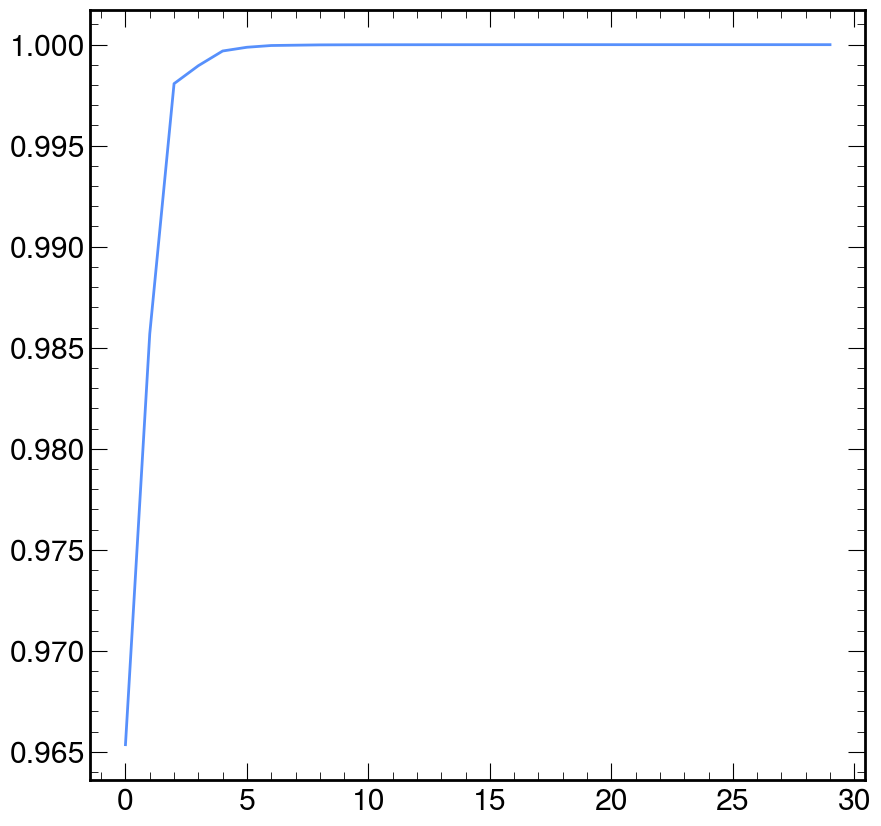

In [27]:
# plot the pca explained variance
plt.rcParams['lines.markersize'] = 8

plt.plot(np.cumsum(pca.explained_variance_ratio_), label=f'explained variance with  \n{n_components} components: {explained_var[-1]:.4f}')
# plt.plot(5, explained_var[5], '*', label=f'explained variance with  \n{5} components: {explained_var[5]:.4f}')
# plt.plot(10, explained_var[10], '*', label=f'explained variance with  \n{10} components: {explained_var[10]:.4f}')
# plt.plot(25, explained_var[25], '*', label=f'explained variance with  \n{25} components: {explained_var[25]:.4f}')
plt.plot(50, explained_var[50], '*', label=f'explained variance with  \n{50} components: {explained_var[50]:.4f}')
plt.plot(100, explained_var[100], '*', label=f'explained variance with \n{100} components: {explained_var[100]:.4f}')
plt.plot(125, explained_var[125], '*', label=f'explained variance with \n{125} components: {explained_var[125]:.4f}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
# plt.savefig('plots_data/IEEECIS_pca/PCA_explained_var2.png', dpi=100, facecolor='white')
plt.show()


/var/folders/mz/8xvqd9y134510qh2hy9fj_7c0000gn/T/ipykernel_87264/1623524977.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
/var/folders/mz/8xvqd9y134510qh2hy9fj_7c0000gn/T/ipykernel_87264/1623524977.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


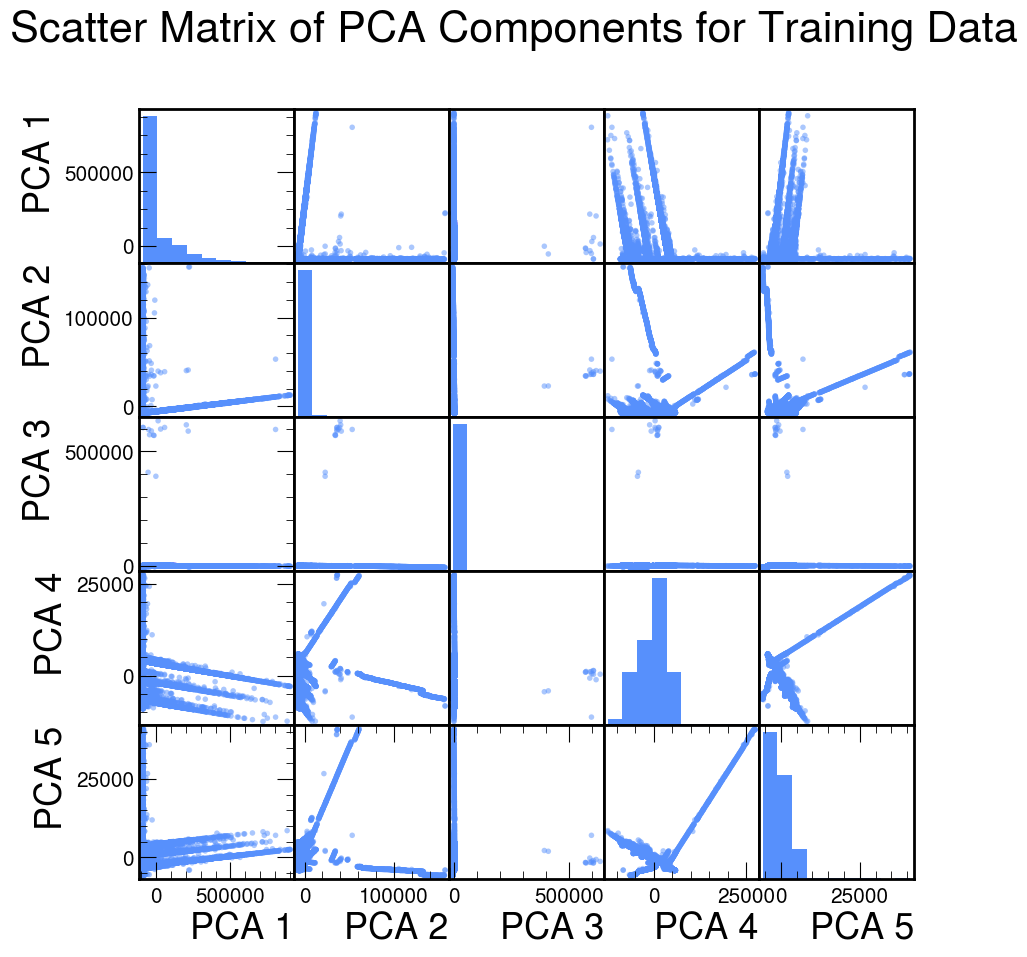

/var/folders/mz/8xvqd9y134510qh2hy9fj_7c0000gn/T/ipykernel_87264/1623524977.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
/var/folders/mz/8xvqd9y134510qh2hy9fj_7c0000gn/T/ipykernel_87264/1623524977.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


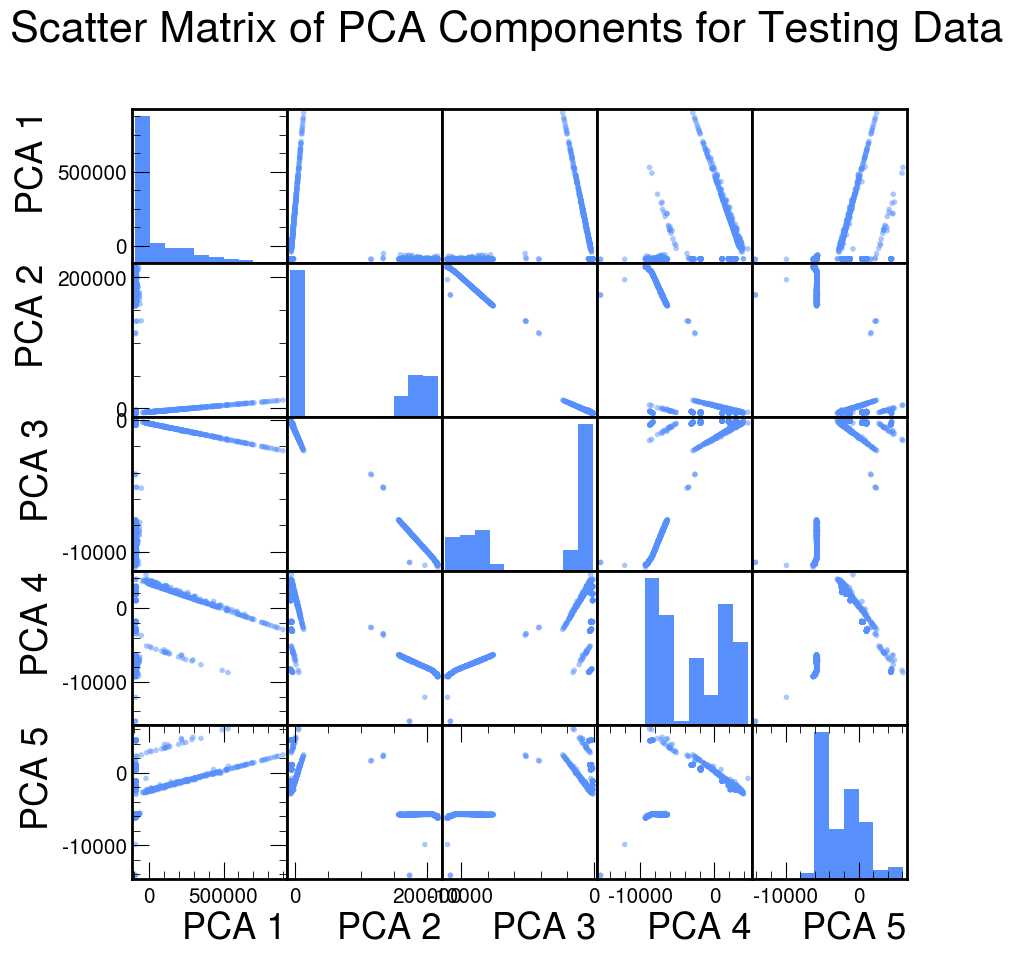

In [28]:
from pandas.plotting import scatter_matrix

names = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5']
df_train_pca = pd.DataFrame(x_train_pca[:,:5], columns=names)
df_test_pca = pd.DataFrame(x_test_pca[:,:5], columns=names)

figs = scatter_matrix(df_train_pca, diagonal='hist')
for ax in figs.ravel():
    # ax.set_xticks(ax.get_xticks())
    # ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
plt.suptitle('Scatter Matrix of PCA Components for Training Data')
# plt.savefig('plots_data/IEEECIS_pca/PCA_train.png', dpi=100, facecolor='white')
plt.show()

figs = scatter_matrix(df_test_pca, diagonal='hist')
for ax in figs.ravel():
    # ax.set_xticks(ax.get_xticks())
    # ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
plt.suptitle('Scatter Matrix of PCA Components for Testing Data')
# plt.savefig('plots_data/IEEECIS_pca/PCA_test.png', dpi=100, facecolor='white')
plt.show()

In [29]:
names = [f'PCA {i}' for i in range(1, n_components+1)]
df_train_pca = pd.DataFrame(x_train_pca, index=train_info.index, columns=names)
df_test_pca = pd.DataFrame(x_test_pca, index=test_info.index, columns=names)
print(df_train_pca.shape)

df_train_pca = pd.concat([df_train_pca, train_info['ENTITY_ID']], axis=1)
df_test_pca = pd.concat([df_test_pca, test_info['ENTITY_ID']], axis=1)
print(df_train_pca.shape, df_train_pca.columns)
print(df_train_pca.head())

df_train_pca.sort_index(axis=0, inplace=True)
df_test_pca.sort_index(axis=0, inplace=True)
test_tranID = np.array(test_info.index)

(16708, 30)
(16708, 31) Index(['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8',
       'PCA 9', 'PCA 10', 'PCA 11', 'PCA 12', 'PCA 13', 'PCA 14', 'PCA 15',
       'PCA 16', 'PCA 17', 'PCA 18', 'PCA 19', 'PCA 20', 'PCA 21', 'PCA 22',
       'PCA 23', 'PCA 24', 'PCA 25', 'PCA 26', 'PCA 27', 'PCA 28', 'PCA 29',
       'PCA 30', 'ENTITY_ID'],
      dtype='object')
                       PCA 1        PCA 2        PCA 3        PCA 4  \
TransactionID                                                         
2987003.0      -87947.170077 -5946.677088  -164.002402  5627.858526   
2987048.0      169038.128727 -2016.283400  -677.571196  2127.127253   
2987074.0      331096.191199  1250.484050 -1049.622340  1005.216673   
2987085.0      -87935.403798 -7202.282982   -87.508749  3891.227573   
2987090.0      -87935.409874 -7202.275769   -87.510305  3891.193636   

                     PCA 5       PCA 6       PCA 7       PCA 8       PCA 9  \
TransactionID                         

### Saving data

In [30]:
# regroup to access previously selected train TS
train_group2 = df_train_pca.groupby('ENTITY_ID')
print(train_group2.size(), len(train_group2))

for uid, group in train_group2:
    arr = group.values[:, :-1]  # drop the ENTITY_ID column
    arr = np.array(arr, dtype=np.float64)
    
    print(f'time series for user: {uid} has shape:\n {arr.shape}')
    # plot_data(arr, group.columns[:-1], path=f'plots_data/IEEECIS_pca/train_{uid}')
    # break
    
    np.save(f'processed/IEEECIS_pca/train_{uid}.npy', arr)

ENTITY_ID
11157.0_204.0_-58.0    89
11207.0_126.0_-74.0    81
1137.0_299.0_-480.0    50
12163.0_204.0_-71.0    64
12318.0_299.0_-7.0     54
                       ..
9749.0_226.0_-5.0      60
9749.0_231.0_33.0      86
9885.0_264.0_-142.0    64
9917.0_nan_116.0       69
9917.0_nan_117.0       76
Length: 213, dtype: int64 213
time series for user: 11157.0_204.0_-58.0 has shape:
 (89, 30)
time series for user: 11207.0_126.0_-74.0 has shape:
 (81, 30)
time series for user: 1137.0_299.0_-480.0 has shape:
 (50, 30)
time series for user: 12163.0_204.0_-71.0 has shape:
 (64, 30)
time series for user: 12318.0_299.0_-7.0 has shape:
 (54, 30)
time series for user: 12501.0_204.0_-482.0 has shape:
 (75, 30)
time series for user: 12544.0_441.0_-54.0 has shape:
 (52, 30)
time series for user: 12544.0_476.0_-102.0 has shape:
 (59, 30)
time series for user: 12570.0_191.0_-22.0 has shape:
 (89, 30)
time series for user: 12616.0_nan_-491.0 has shape:
 (211, 30)
time series for user: 12695.0_126.0_33.0 ha

In [31]:
# regroup to access previously selected test TS
test_group2 = df_test_pca.groupby('ENTITY_ID')
print(test_group2.size(), len(test_group2))

anomaly_count = 0

for uid, group in test_group2:
    # print(len(group.index))
    arr = group.values[:, :-1]  # drop the ENTITY_ID column
    arr = np.array(arr, dtype=np.float64)

    print(arr.shape)

    # extract labels of the transactions we actually use in TS
    label_idx = np.where(np.isin(labels['TransactionID'], list(group.index)))
    y_test = np.array(labels.loc[label_idx, 'EVENT_LABEL'])
    y_test = y_test[:, np.newaxis]
    # print(y_test.shape)

    anomaly_count += len(y_test[y_test == 1])

    # plot_data(arr, group.columns[:-1], y=y_test, path=f'plots_data/IEEECIS_pca/test_{uid}')
    # break
    # plot_data(arr[:,:30], group.columns[:30], y=y_test, path=f'plots_data/IEEECIS_pca/test_{uid}')

    np.save(f'processed/IEEECIS_pca/test_{uid}.npy', arr)
    np.save(f'processed/IEEECIS_pca/labels_{uid}.npy', y_test)

print(anomaly_count)

ENTITY_ID
12538.0_184.0_65.0      22
13623.0_498.0_117.0     21
14590.0_387.0_173.0     20
14777.0_433.0_168.0     25
15775.0_330.0_129.0    389
15885.0_nan_172.0       30
15885.0_nan_173.0       45
15885.0_nan_174.0       20
15885.0_nan_175.0       20
15885.0_nan_176.0       48
15885.0_nan_177.0       22
15885.0_nan_178.0       26
15885.0_nan_181.0       22
16136.0_nan_144.0       22
16136.0_nan_174.0       30
16346.0_nan_173.0       27
1684.0_485.0_165.0      22
5812.0_nan_173.0        23
8135.0_325.0_49.0       43
9175.0_330.0_150.0      25
9500.0_126.0_-85.0      27
dtype: int64 21
(22, 30)
(21, 30)
(20, 30)
(25, 30)
(389, 30)
(30, 30)
(45, 30)
(20, 30)
(20, 30)
(48, 30)
(22, 30)
(26, 30)
(22, 30)
(22, 30)
(30, 30)
(27, 30)
(22, 30)
(23, 30)
(43, 30)
(25, 30)
(27, 30)
62


In [32]:
print(anomaly_count, len(test_tranID), anomaly_count/len(test_tranID))


62 929 0.06673842841765339
